[![logo](static/polars.svg)](https://pola-rs.github.io/polars/py-polars/html/index.html)

<u>**1. Polars**</u>

Polars est un librairie écrite en Rust mais proposant une API en Python. La libraire, bien qu'assez jeune, propose de gros avantages par rappport à pandas:
- Multithread
- L'utilisation de Lazyframe(*cfr. infra*)
- Permet d'ingérer de très gros volumes de données rapidement sans pour autant nécessiter un matériel onéreux
- L'utilisation de DataFrame comme structure de données permettant aux utilisateurs de Pandas de rapidement prendre en main Polars
- Plus expressif que Pandas

Ceci dit, quelques inconvénients sont à prendre en compte:
- Manque relatif de stabilité
- Communauté plus restreinte
- Une API moins riche que celle de pandas
- N'est pas aussi répandu et suppporté par d'autres librairies que ne l'est Pandas

<u>**2. Les données**</u>

Les données utilisées pour ce guide reprennent tous les trajets effectués en taxi jaune à New York en 2022.

Elles sont disponnibles [ici](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Un utilitaire est fourni en annexe afin de faciliter le téléchargement des données.

In [ ]:
import os

import polars as pl
import polars.selectors as cs

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

from datetime import datetime
from pprint import pprint

from typing import List

from sqlalchemy import create_engine

# prefers full than scientific notation
pl.Config.set_fmt_float("full")

polars.config.Config

# 1. I/O et bref commentaire sur les structures de données

Polars propose deux grandes structures de données:
- Les DataFrame (eager)
- Les LazyFrame (lazy)

Les LazyFrame sont à préférer dans la majorité des cas d'utilisation. Qu'est-ce qui les différencie des DataFrame ?

Les DataFrame sont similaires à ceux de Pandas et cela signifie que les données sont lues et chargées directement en mémoire RAM. De même que chaque opération appliquée sur un DataFrame (*e.g.* une somme, un group by, *etc.*) est éxecutée directement.

Les LazyFrame quant à eux permettent de construire un graphe des opérations à effectuer. Nous ne rentrerons pas dans les détails de la notion de graphe mais retenons que ceci a pour gros avantages de pouvoir optimiser les requêtes, de réduire la quantité de mémoire RAM utilisée et donc de pouvoir manipuler de gros volumes de données tout en ayant une quantité limitée de mémoire.

<br>

In [ ]:
# scan_parquet => LazyFrame <> read_parquet
path = "./data/2022/*.parquet"
data = pl.scan_parquet(f"{path}")


La méthode ``head()`` permet comme dans pandas de récupérer les 5 premières lignes mais, à nouveau, ceci renvoie le graphe et non pas effectivement les 5 premières lignes.

Pour effectivement éxecuter vos opérations du graphe, il faut appeler la méthode ``collect()``

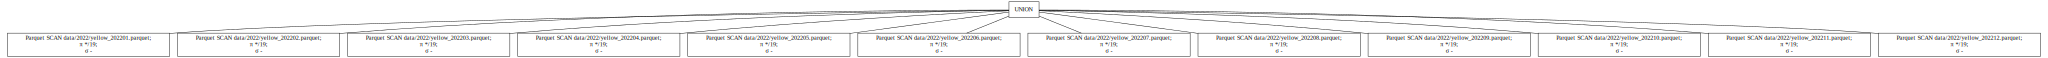

None

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.8,1,"""N""",142,236,1,14.5,3,0.5,3.65,0,0.3,21.95,2.5,0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.1,1,"""N""",236,42,1,8,0.5,0.5,4,0,0.3,13.3,0,0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,"""N""",166,166,1,7.5,0.5,0.5,1.76,0,0.3,10.56,0,0
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,"""N""",114,68,2,8,0.5,0.5,0,0,0.3,11.8,2.5,0
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.3,1,"""N""",68,163,1,23.5,0.5,0.5,3,0,0.3,30.3,2.5,0


In [ ]:
display(data.head(5).show_graph())

data.head(5).collect()

# 2. Indexation et filtrage

La méthode ``select()`` et ``filter()`` permettent respectivement de sélectionner des colonnes et de filter des lignes notamment via l'indexation booléenne.

La méthode ``select()`` offre  pas mal de flexibilité pour la sélection de colonne. Puisqu'il est possible:
- de sélectionner une ou plusieurs colonnes via leur nom la fonction ``col()``
- de sélectionner une ou plusieurs colonnes via leur type, toujours avec la fonction ``col()``
- via le sélecterurs qui permettent d'y ajouter des conditions et autres fonctionnalités plus élaborées (*e.g.* ``contains()``)

<br>

## 2.1. Sélectionner des colonnes

<br>

In [ ]:
pprint(data.columns)
data.select(pl.col("passenger_count")).head(5).collect()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']


passenger_count
f64
2
1
1
1
1


In [ ]:
data.select(pl.col("passenger_count", "VendorID")).head(5).collect()

passenger_count,VendorID
f64,i64
2,1
1,1
1,2
1,2
1,2


In [ ]:
data.select(pl.col(pl.Float64, pl.Int64)).schema

OrderedDict([('VendorID', Int64),
             ('passenger_count', Float64),
             ('trip_distance', Float64),
             ('RatecodeID', Float64),
             ('PULocationID', Int64),
             ('DOLocationID', Int64),
             ('payment_type', Int64),
             ('fare_amount', Float64),
             ('extra', Float64),
             ('mta_tax', Float64),
             ('tip_amount', Float64),
             ('tolls_amount', Float64),
             ('improvement_surcharge', Float64),
             ('total_amount', Float64),
             ('congestion_surcharge', Float64),
             ('airport_fee', Float64)])

In [ ]:
# Selector offers more flexible approach to select columns
# by_name of a column, by datatype et with contains
data.select(
    cs.by_name("tpep_pickup_datetime") | ~cs.numeric() | cs.contains("Vendor")
).schema

OrderedDict([('tpep_pickup_datetime',
              Datetime(time_unit='ns', time_zone=None)),
             ('tpep_dropoff_datetime',
              Datetime(time_unit='ns', time_zone=None)),
             ('store_and_fwd_flag', Utf8),
             ('VendorID', Int64)])

## 2.2. nouvelle colonne, alias et cast

Il également possible de créer de nouvelles colonnes dans le select via une sur une colonne ou entre plusieurs colonnes par exemple.

la méthode ``cast()`` permet de modifier le type d'une colonne ou de plusieurs colonnes

la méthode ``alias()`` permet de nommer ou modifier le nom d'une colonne

In [ ]:
data.select(
    ((pl.col("total_amount") - pl.col("fare_amount")).cast(pl.Int32)).alias("extras")
).head(5).collect()

extras
i32
7
5
3
3
6


## 2.3. Sélectionner des lignes et indexation booléenne

Nous reviendrons plus tard et plus en détail sur la manière d'optimiser ses requêtes mais il est vivement conseillé de filter le plus tôt possible ses données avant d'effectuer quelconque opération.

Pour le reste, le principe est similaire à ce que l'on retrouve avec Numpy ou Pandas.

<br>

In [ ]:
# start index, size
data.slice(10, 5).collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2022-01-01 00:55:03,2022-01-01 01:04:25,1,1.91,1,"""N""",141,229,2,8.5,0.5,0.5,0,0,0.3,12.3,2.5,0
2,2022-01-01 00:31:06,2022-01-01 00:34:14,3,0.82,1,"""N""",114,90,2,4.5,0.5,0.5,0,0,0.3,8.3,2.5,0
2,2022-01-01 00:41:07,2022-01-01 00:44:46,3,0.73,1,"""N""",234,113,2,4.5,0.5,0.5,0,0,0.3,8.3,2.5,0
2,2022-01-01 00:56:34,2022-01-01 01:12:04,2,2.16,1,"""N""",246,79,1,11.5,0.5,0.5,3.06,0,0.3,18.36,2.5,0
2,2022-01-01 00:39:46,2022-01-01 00:47:36,4,1.43,1,"""N""",43,140,1,7.5,0.5,0.5,2.26,0,0.3,13.56,2.5,0


In [ ]:
data.filter((pl.col("VendorID") == 1) & (pl.col("airport_fee") > 0)).select(
    "VendorID"
).head(5).collect()


VendorID
i64
1
1
1
1
1


## 2.4. Ajouter des colonnes et équivalent du ``CASE`` en SQL 

la méthode ``with_columns()`` permet de rajouter une colonne au lazyFrame. Comme pour Pandas, il faut bien penser à écraser l'ancien LazyFrame par le nouveau. Ce qui revient en réalité à mettre à jour le plan d'execution.

La méthode ``when()`` combinée aux méthodes ``then()`` et  ``otherwise()`` proposent un comportement similaire aux clauses ``CASE WHEN ELSE`` en SQL.

La méthode ``lit()`` permet de signifier qu'il s'agit d'un litéral pour éviter de confondre avec le nom d'une colonne. Cette clause est facultative avec les versions < 19.0 mais au délà, un string passé sans la méthode ``lit()`` fera nécessairement référence à une colonne.

In [ ]:
data = data.with_columns(
    pl.when(pl.col("passenger_count") == 1)
    .then(pl.lit("single passenger"))
    .when(pl.col("passenger_count").is_between(1, 5, "none"))
    .then(pl.lit("small group"))
    .when(pl.col("passenger_count") >= 5)
    .then(pl.lit("big group"))
    .when(pl.col("passenger_count").is_null())
    .then(pl.lit("empty"))
    .otherwise(pl.lit("ERROR"))
    .alias("group_type")
)

data.select(pl.col("group_type")).head(5).collect()

group_type
str
"""small group"""
"""single passeng…"
"""single passeng…"
"""single passeng…"
"""single passeng…"


# 3. Aggrégations et group by

A nouveau, le comportement est très similaire à ce que l'on retrouve avec Pandas ou Numpy avec quelques subtilités.

Par exemple un LazyFrame ne permet pas de choisir son axis durant les aggrégations contrairement au DataFrame. Depuis la version 19.14, il faut utiliser des méthodes différentes pour appliquer une aggrégation verticale (*e.g.* ``sum_horizontal``).

<br>

In [ ]:
data.select(pl.col("passenger_count").sum().alias("total passenger")).head(5).collect()

total passenger
f64
53646914


In [ ]:
# data.select(
#     pl.col('mta_tax', 'tolls_amount')
#     ).sum_horizontal().head(5).collect()

## 3.1. Choisir un axis avec les LazyFrame et la méthode ``fetch()``

Nous pourrions utiliser la méthode ``collect()`` sur notre LazyFrame afin d'obtenir un DataFrame pour pouvoir choisir notre axe(< 19.14).

Sauf que cette méthode implique de d'abord charger toutes les lignes pour pouvoir faire la somme, ce qui n'est pas nécessaire lorsqu'on est en phase de développement. C'est ici qu'intervient la méthode ``fetch()`` qui permet de récupérer seulement quelques lignes afin de tester notre code. A ne pas confondre avec la méthode ``head()`` qui elle viendrait plutôt après une série d'opérations.

In [ ]:
data.select("mta_tax", "tolls_amount").fetch(5).sum(axis=1)

mta_tax
f64
0.5
0.5
0.5
0.5
0.5
0.5
7.05
7.05
3.5


## 3.2. group by

Les méthodes ``group_by()`` et ``agg()`` fonctionnent de la même manière que celles de Pandas.

<br>

In [ ]:
data.group_by("group_type").agg(
    pl.sum("passenger_count").alias("sum"), pl.mean("passenger_count").alias("average")
).collect()

PARTITIONED DS


group_type,sum,average
str,f64,f64
"""small group""",19196584,2.3649038058196594
"""big group""",6188911,5.401610120156787
"""single passeng…",28261419,1
"""empty""",0,null
"""ERROR""",0,0


> Regroupons plusieurs notions ensemble avec cette exemple qui permet d'avoir le nombre de passagers transportés par "group_type" ainsi que la moyenne de passagers par trajet mais excluant les lignes à 'empty' ou 'ERROR'. Ensuite, on souhaite également afficher le ratio de passagers tranportés par "group_type".
>
> Dans l'odre:
> - D'abord sélectionner les colonnes et filtrer les données.
> - Regrouper les données et appliquer les aggrégations
> - Calculer le ratio

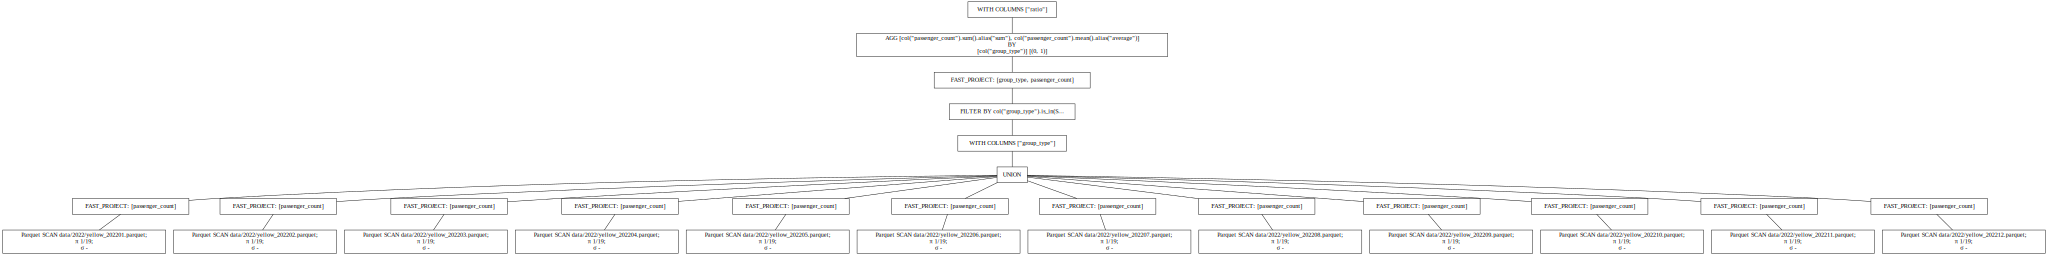

PARTITIONED DS


group_type,sum,average,ratio
str,f64,f64,f64
"""big group""",6188911,5.401610120156787,0.115363784019338
"""small group""",19196584,2.3649038058196594,0.3578320273930389
"""single passeng…",28261419,1,0.5268041885876231


In [ ]:
query = (
    data.select(pl.col("group_type", "passenger_count"))
    .filter(~pl.col("group_type").is_in(("empty", "ERROR")))
    .group_by("group_type")
    .agg(
        pl.sum("passenger_count").alias("sum"),
        pl.mean("passenger_count").alias("average"),
    )
    .with_columns((pl.col("sum") / pl.col("sum").sum()).alias("ratio"))
)

query.show_graph()
query.collect()


# 4 Jointure, pivots et la méthode ``over``

A noter qu'on ne peut pas faire des jointures entre un DataFrame et un LazyFrame.

<br>

In [ ]:
taxi_zone = pl.scan_csv("data/taxi_zone.csv")
taxi_zone.fetch(5)

LocationID,Borough,Zone,service_zone
i64,str,str,str
1,"""EWR""","""Newark Airport…","""EWR"""
2,"""Queens""","""Jamaica Bay""","""Boro Zone"""
3,"""Bronx""","""Allerton/Pelha…","""Boro Zone"""
4,"""Manhattan""","""Alphabet City""","""Yellow Zone"""
5,"""Staten Island""","""Arden Heights""","""Boro Zone"""


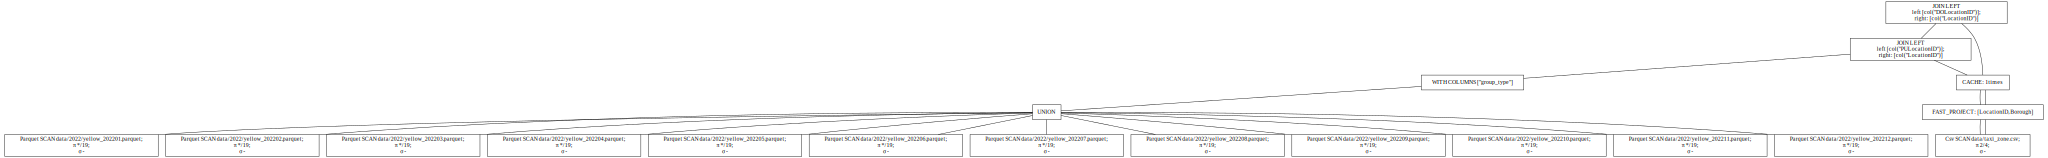

In [ ]:
data = data.join(
    taxi_zone.select(pl.col("LocationID", "Borough")),
    left_on="PULocationID",
    right_on="LocationID",
    how="left",
).join(
    taxi_zone.select(pl.col("LocationID", "Borough")),
    left_on="DOLocationID",
    right_on="LocationID",
    how="left",
    suffix="_DropOff",
)
data.show_graph()


In [ ]:
# LazyFrame can't perform pivot operation
data.group_by(["Borough", "Borough_DropOff"]).agg(pl.col("passenger_count").sum()).sort(
    ["Borough", "Borough_DropOff"]
).collect().pivot("passenger_count", "Borough", "Borough_DropOff", "first").rename(
    {"Borough": "PickUp/DropOff"}
)

PARTITIONED DS


PickUp/DropOff,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
str,f64,f64,f64,f64,f64,f64,f64
"""Bronx""",28046,4348,11,17218,4023,241,1315
"""Brooklyn""",4210,145699,650,108161,21966,958,2769
"""EWR""",0,18,15333,172,46,25,1799
"""Manhattan""",175404,1124000,143431,44234794,1795865,5339,133674
"""Queens""",101582,698972,7958,2884257,1139201,6279,145574
"""Staten Island""",253,738,32,907,413,1025,75
"""Unknown""",5417,30778,4990,266531,52271,199,329947


Imaginons maintenant que nous voulions avoir les valeurs sous forme de ratio en divisant par le total de la matrice ou bien par colonne ou par ligne.

Pour ce faire, polars fournit une méthode ``over`` similaire à celle de SQL

<br>

In [ ]:
ratio_over_matrix = (
    data.group_by(["Borough", "Borough_DropOff"])
    .agg(pl.col("passenger_count").sum())
    .with_columns(
        (pl.col("passenger_count") / pl.col("passenger_count").sum() * 100).round(2)
    )
    .collect()
    .pivot("passenger_count", "Borough", "Borough_DropOff")
)

display(ratio_over_matrix)

# check sum == 100%
ratio_over_matrix.sum().drop(columns="Borough").sum(
    axis=1
)  # replaced by sum_horizontal in 0.19.14


PARTITIONED DS


Borough,Bronx,Queens,Unknown,Brooklyn,Staten Island,EWR,Manhattan
str,f64,f64,f64,f64,f64,f64,f64
"""Staten Island""",0,0,0,0,0,0,0
"""Brooklyn""",0.01,0.04,0.01,0.27,0,0,0.2
"""Manhattan""",0.33,3.35,0.25,2.1,0.01,0.27,82.46
"""Unknown""",0.01,0.1,0.62,0.06,0,0.01,0.5
"""Bronx""",0.05,0.01,0,0.01,0,0,0.03
"""Queens""",0.19,2.12,0.27,1.3,0.01,0.01,5.38
"""EWR""",0,0,0,0,0,0.03,0


Bronx
f64
100.00999999999999


In [ ]:
ratio_over_column = (
    data.group_by(["Borough", "Borough_DropOff"])
    .agg(pl.col("passenger_count").sum())
    .with_columns(
        (
            (pl.col("passenger_count") / pl.col("passenger_count").sum()).over(
                "Borough_DropOff"
            )
        ).round(2)
    )
    .collect()
    .pivot("passenger_count", "Borough", "Borough_DropOff", "first")
    .rename({"Borough": "PickUp/DropOff"})
)

display(ratio_over_column)

ratio_over_column.sum()


PARTITIONED DS


PickUp/DropOff,Staten Island,Unknown,EWR,Manhattan,Queens,Bronx,Brooklyn
str,f64,f64,f64,f64,f64,f64,f64
"""Brooklyn""",0.07,0,0,0,0.01,0.01,0.07
"""EWR""",0,0,0.09,0,0,0,0
"""Staten Island""",0.07,0,0,0,0,0,0
"""Manhattan""",0.38,0.22,0.83,0.93,0.6,0.56,0.56
"""Bronx""",0.02,0,0,0,0,0.09,0
"""Unknown""",0.01,0.54,0.03,0.01,0.02,0.02,0.02
"""Queens""",0.45,0.24,0.05,0.06,0.38,0.32,0.35


PickUp/DropOff,Staten Island,Unknown,EWR,Manhattan,Queens,Bronx,Brooklyn
str,f64,f64,f64,f64,f64,f64,f64
null,1,1,1,1,1.01,1,1


In [ ]:
ratio_over_row = (
    data.group_by(["Borough", "Borough_DropOff"])
    .agg(pl.col("passenger_count").sum())
    .with_columns(
        (
            (pl.col("passenger_count") / pl.col("passenger_count").sum()).over(
                "Borough"
            )
        ).round(2)
    )
    .collect()
    .pivot("passenger_count", "Borough", "Borough_DropOff", "first")
    .rename({"Borough": "PickUp/DropOff"})
)

display(ratio_over_row)

ratio_over_row.drop(columns="PickUp/DropOff").transpose().sum()


PARTITIONED DS


PickUp/DropOff,Brooklyn,EWR,Manhattan,Staten Island,Bronx,Unknown,Queens
str,f64,f64,f64,f64,f64,f64,f64
"""EWR""",0,0.88,0.01,0,0,0.1,0
"""Brooklyn""",0.51,0,0.38,0,0.01,0.01,0.08
"""Manhattan""",0.02,0,0.93,0,0,0,0.04
"""Bronx""",0.08,0,0.31,0,0.51,0.02,0.07
"""Staten Island""",0.21,0.01,0.26,0.3,0.07,0.02,0.12
"""Queens""",0.14,0,0.58,0,0.02,0.03,0.23
"""Unknown""",0.04,0.01,0.39,0,0.01,0.48,0.08


column_0,column_1,column_2,column_3,column_4,column_5,column_6
f64,f64,f64,f64,f64,f64,f64
0.99,0.99,0.9900000000000001,0.99,0.9900000000000001,1,1.01


# 5. Gestion des times series

## 5.1. Calcul sur les dates

Pour réaliser un datediff, il suffit d'appliquer une soustraction. Le résultat pourra être ensuite converti dans l'unité voulue.

<br>

In [ ]:
data = data.filter(
    (pl.col("tpep_pickup_datetime") < pl.col("tpep_dropoff_datetime"))
    & (
        pl.col("tpep_pickup_datetime").is_between(
            datetime(2022, 1, 1), datetime(2023, 1, 1)
        )
    )  # remove inconsistent data
).with_columns(
    (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime"))
    .dt.minutes()
    .alias("runtime")
)

data.select(pl.col("tpep_pickup_datetime", "tpep_dropoff_datetime", "runtime")).fetch(5)

tpep_pickup_datetime,tpep_dropoff_datetime,runtime
datetime[ns],datetime[ns],i64
2022-01-01 00:35:40,2022-01-01 00:53:29,17
2022-01-01 00:33:43,2022-01-01 00:42:07,8
2022-01-01 00:53:21,2022-01-01 01:02:19,8
2022-01-01 00:25:21,2022-01-01 00:35:23,10
2022-01-01 00:36:48,2022-01-01 01:14:20,37
2022-02-01 00:06:58,2022-02-01 00:19:24,12
2022-02-01 00:38:22,2022-02-01 00:55:55,17
2022-02-01 00:03:20,2022-02-01 00:26:59,23
2022-02-01 00:08:00,2022-02-01 00:28:05,20


PARTITIONED DS


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
PickUp/DropOff,,,,,,,
Bronx,16.648156,57.402110,52.066667,32.340471,37.347130,80.151020,28.768916
Brooklyn,58.960339,16.459880,54.134963,28.428959,35.130776,38.723140,27.536122
EWR,54.000000,58.181818,1.134547,67.165354,92.031250,25.714286,3.453767
Manhattan,29.495254,29.478057,44.490514,13.345894,36.616981,49.960637,25.994717
Queens,38.076887,38.457938,71.674220,42.154028,18.484234,53.850500,42.282024
Staten Island,63.879845,44.380109,27.777778,68.079383,64.267003,27.809133,49.784615
Unknown,35.274480,37.105002,28.825557,24.145515,30.575745,57.445476,15.146405


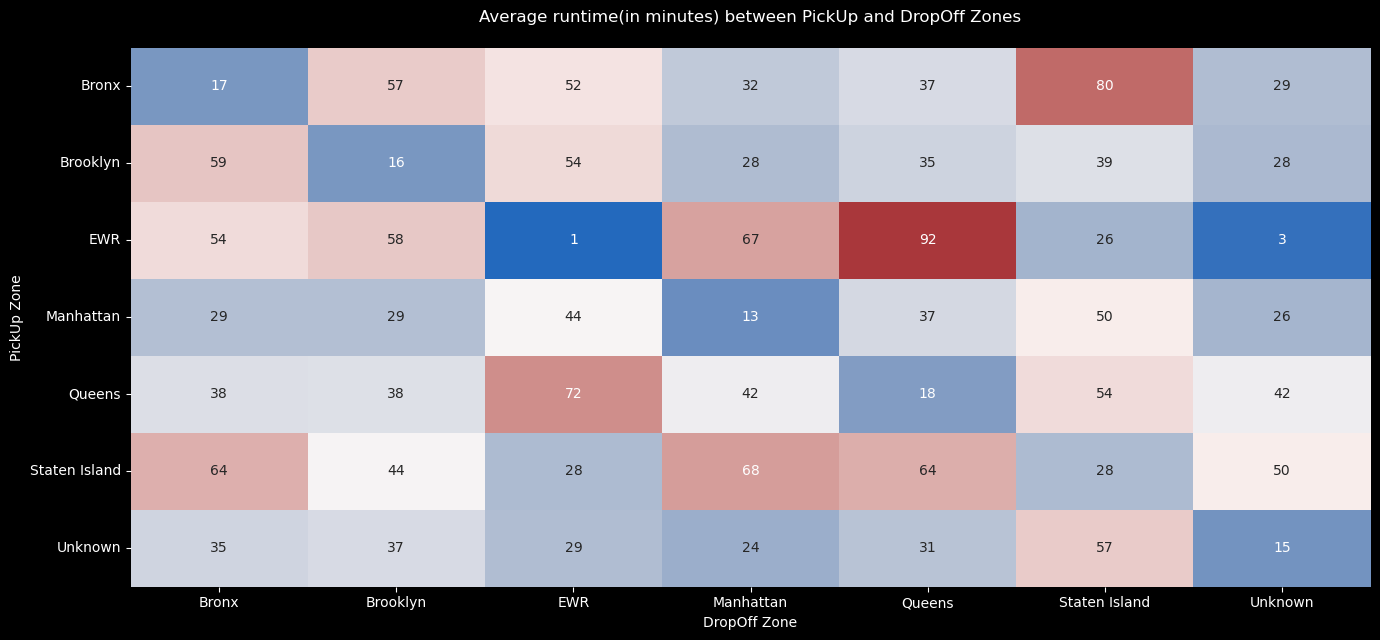

In [ ]:
runtime = (
    data.select(pl.col("Borough", "Borough_DropOff", "runtime"))
    .group_by("Borough", "Borough_DropOff")
    .mean()
    .sort(["Borough", "Borough_DropOff"])
    .collect()
    .pivot("runtime", "Borough", "Borough_DropOff", "first")
    .rename({"Borough": "PickUp/DropOff"})
    .to_pandas()
    .set_index("PickUp/DropOff")
)

display(runtime)

plt.figure(figsize=(16, 7))
plt.title("Average runtime(in minutes) between PickUp and DropOff Zones\n")
sns.heatmap(data=runtime, annot=True, fmt=".0f", cmap="vlag", cbar=False)
plt.xlabel("DropOff Zone")
plt.ylabel("PickUp Zone")
plt.show()


> Actuellement, Polars ne permet pas d'appliquer un groupby suivi du calcul du coefficient de corrélation
>
> Trois solutions sont possibles:
> - Itérer dans la colonne, appliquer un coefficient de corrélation puis tout regrouper
> - Passer par Pandas qui offre cette possibilité
> - Ecrire son plugin en rust

In [ ]:
data.select(
    pl.col("runtime", "trip_distance", "Borough")
).collect().to_pandas().groupby("Borough").corr("spearman")

runtime  trip_distance
Borough                                             
Bronx         runtime        1.000000       0.462371
              trip_distance  0.462371       1.000000
Brooklyn      runtime        1.000000       0.660129
              trip_distance  0.660129       1.000000
EWR           runtime        1.000000       0.270333
              trip_distance  0.270333       1.000000
Manhattan     runtime        1.000000       0.820406
              trip_distance  0.820406       1.000000
Queens        runtime        1.000000       0.739036
              trip_distance  0.739036       1.000000
Staten Island runtime        1.000000       0.250033
              trip_distance  0.250033       1.000000
Unknown       runtime        1.000000       0.819969
              trip_distance  0.819969       1.000000

## 5.2. Datepart

Il possible d'extraire des éléments précis d'une date en utilisant l'attribut ``dt`` sur une colonne date et puis en spécifiant la partie de la data que l'on souhaite extraire.

Il existe également la méthode ``strftime`` qui est similaire à la fonction ``format`` en SQL. Pour l'exemple ci-dessous nous avons remplacé les numéros des jours dans la semaine par leur nom à l'aide d'un dictionnaire afin de donner un exemple d'utilisation de la méthode ``map_dict``

<br>

In [ ]:
# Analyse average runtime by weekday
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
weekday_lit = dict(zip(range(1, 8), weekdays))

data.with_columns(weekday=pl.col("tpep_pickup_datetime").dt.weekday()).select(
    pl.col("weekday", "runtime")
).group_by("weekday").mean().sort("weekday").select(
    pl.col("weekday").map_dict(
        weekday_lit
    ),  # pl.Series(weekdays) also works as column is sorted
    pl.col("runtime").alias("avg runtime"),
).collect()

PARTITIONED DS


weekday,avg runtime
str,f64
"""Monday""",16.210894746259683
"""Tuesday""",16.83200243999036
"""Wednesday""",17.2403416680809
"""Thursday""",17.715622911248968
"""Friday""",17.393299469104804
"""Saturday""",16.127462907285604
"""Sunday""",16.144333213410196


In [ ]:
data.select(pl.col("tpep_pickup_datetime").dt.strftime("%A")).fetch(5)

tpep_pickup_datetime
str
"""Saturday"""
"""Saturday"""
"""Saturday"""
"""Saturday"""
"""Saturday"""
"""Tuesday"""
"""Tuesday"""
"""Tuesday"""
"""Tuesday"""


## 5.3. Moyenne Mobile

La méthode ``rolling`` permet de faire des aggrégations sur une fenêtre de temps donnée. Il s'agit en réalité d'une sorte de groupby.

Attention que pour fonctionner correctement, il faut absolument trié la colonne qui sera utilisée dans le groupby(*i.e.* la méthode ``rolling``)

Nous faisons ici l'exemple avec des données temporelles mais cela peut également fonctionner avec des colonnes de type *integer* par exemple (*e.g.* moyenne mobile du salaire moyen des personnes selon leur âge).

<br>

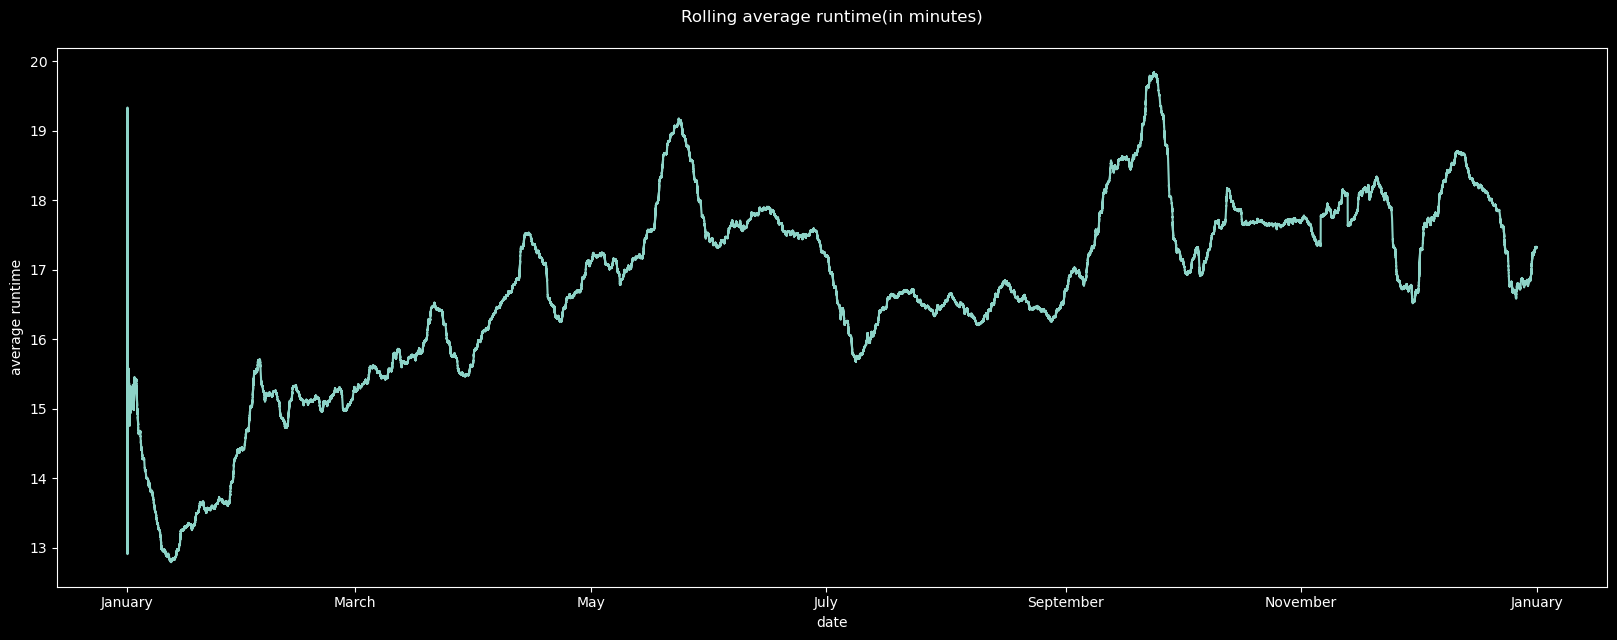

In [ ]:
rolling_avg_runtime = (
    data.select(pl.col("tpep_pickup_datetime"), pl.col("runtime"))
    .sort("tpep_pickup_datetime")
    .rolling("tpep_pickup_datetime", period="7d", check_sorted=False)
    .agg(pl.mean("runtime"))
    .collect()
    .to_pandas()
)

plt.figure(figsize=(20, 7))
plt.title("Rolling average runtime(in minutes)\n")
plt.plot(rolling_avg_runtime["tpep_pickup_datetime"], rolling_avg_runtime["runtime"])
plt.xlabel("date")
plt.ylabel("average runtime")
plt.gca().xaxis.set_major_formatter(DateFormatter("%B"))
plt.show()


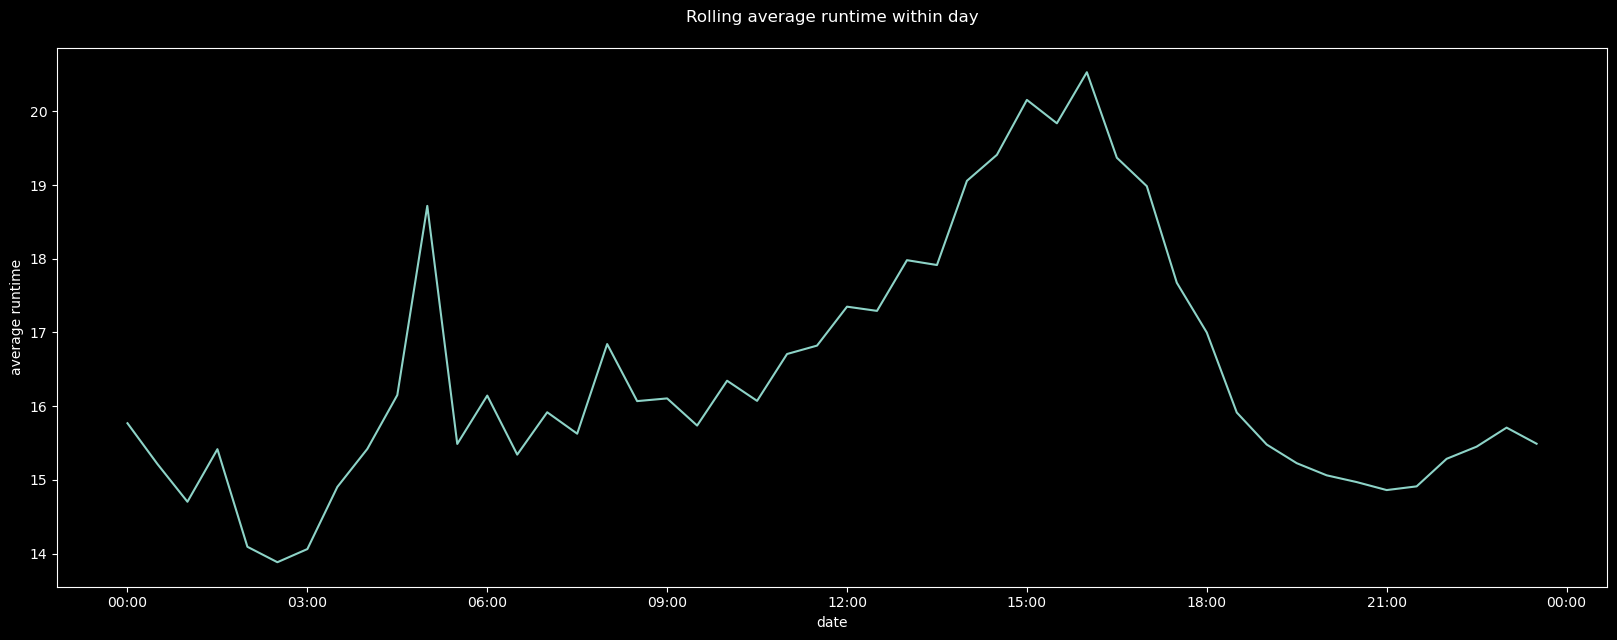

In [ ]:
# Rolling Avg but within Time dimension
rolling_avg_runtime_within_day = (
    data.with_columns(date=pl.datetime(2022, 1, 1))
    .select(
        pl.datetime(2022, 1, 1)
        .dt.combine(pl.col("tpep_pickup_datetime").dt.time())
        .alias("date"),
        pl.col("runtime"),
    )
    .sort("date")
    .group_by_dynamic("date", every="30m", check_sorted=False)
    .agg(pl.mean("runtime"))
    .collect()
)


plt.figure(figsize=(20, 7))
plt.title("Rolling average runtime within day\n")
plt.plot(
    rolling_avg_runtime_within_day.select(pl.col("date")),
    rolling_avg_runtime_within_day.select(pl.col("runtime")),
)
plt.xlabel("date")
plt.ylabel("average runtime")
plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.show()

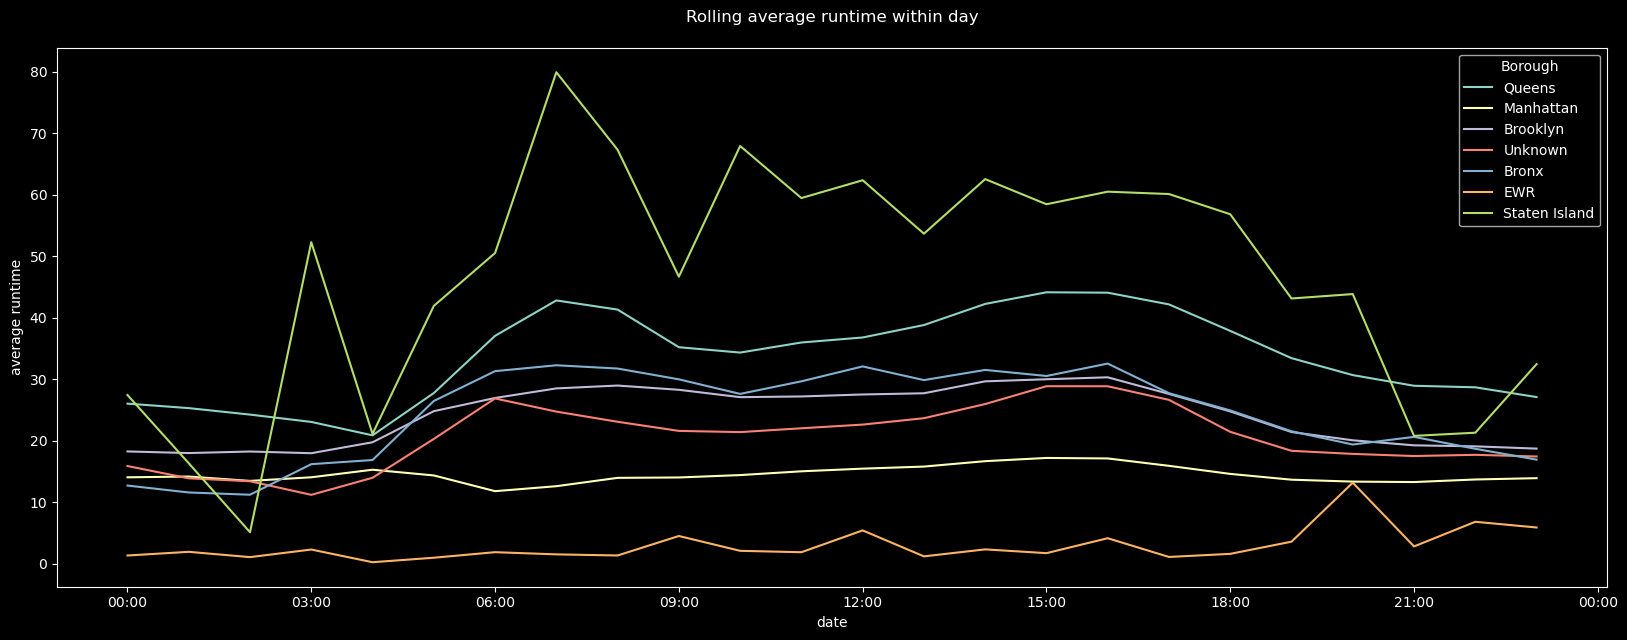

In [ ]:
rolling_avg_runtime_within_day = (
    data.with_columns(date=pl.datetime(2022, 1, 1))
    .select(
        pl.datetime(2022, 1, 1)
        .dt.combine(pl.col("tpep_pickup_datetime").dt.time())
        .alias("date"),
        pl.col(("runtime", "Borough")),
    )
    .sort("date")
    .group_by_dynamic("date", every="60m", check_sorted=False, by="Borough")
    .agg(pl.mean("runtime"))
    .collect()
    .to_pandas()
)

plt.figure(figsize=(20, 7))
plt.title("Rolling average runtime within day\n")
sns.lineplot(data=rolling_avg_runtime_within_day, x="date", y="runtime", hue="Borough")
plt.xlabel("date")
plt.ylabel("average runtime")
plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.show()

# 6. SQL

Polars offre la possibilité de faire des reqûetes sql sur des LazyFrame ou DataFrame.

Pour ce faire, il faut utiliser la fonction ``SQLContext`` qui permet de spécifier sur quel LazyFrame appliquer la requête et de lui donner un nom que l'on pourra utiliser dans la requête SQL. La requête est passée via la méthode ``execute``.

<br>

In [ ]:
data = pl.scan_parquet("data/**/*.parquet")

query = "SELECT * FROM yellow_taxi WHERE passenger_count > 5"

pl.SQLContext(yellow_taxi=data).execute(query).head(5).collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2022-01-01 00:46:09,2022-01-01 01:08:06,6,5.95,1,"""N""",79,238,1,20,0.5,0.5,4.76,0,0.3,28.56,2.5,0
2,2022-01-01 00:07:59,2022-01-01 00:28:49,6,2.99,1,"""N""",125,162,1,14.5,0.5,0.5,3.66,0,0.3,21.96,2.5,0
2,2022-01-01 00:41:35,2022-01-01 00:56:05,6,3.7,1,"""N""",161,74,1,13.5,0.5,0.5,3.46,0,0.3,20.76,2.5,0
2,2022-01-01 01:01:24,2022-01-01 01:08:03,6,1.3,1,"""N""",74,262,2,7,0.5,0.5,0,0,0.3,10.8,2.5,0
2,2022-01-01 00:15:34,2022-01-01 01:29:42,6,16.21,1,"""N""",161,134,1,60.5,0.5,0.5,14.17,6.55,0.3,85.02,2.5,0


In [ ]:
# E.g. with join and group by operation
taxi_zone = pl.scan_csv("data/taxi_zone.csv")

query = """
SELECT
    AVG(passenger_count) 'Avg passenger per trip',
    Borough
FROM yellow_taxi
    JOIN zone
        ON zone.LocationID = yellow_taxi.PULocationID

GROUP BY Borough
"""

pl.SQLContext(yellow_taxi=data, zone=taxi_zone).execute(query).head(5).collect()

PARTITIONED DS


Avg passenger per trip,Borough
f64,str
1.3817306344725409,"""Unknown"""
1.455781973133676,"""Queens"""
1.3967284715074182,"""Manhattan"""
1.3232943125139582,"""Brooklyn"""
1.1480564856602125,"""Bronx"""


# 7. Pipelines 

Malgré les exemples précédents, relativement simples, les requêtes peuvent vite devenir assez longues.

Polars offre la possibilité de compartimenter nos opérations dans des fonctions afin de gagner, notamment, en lisibilité mais aussi en reproductibilité.

La méthode ``pipe`` permet de lui donner une fonction qui sera appliquée à un LazyFrame ou à un DataFrame.

<br>

In [ ]:
def select_cast(data: pl.LazyFrame, columns: List[str], schema: dict) -> pl.LazyFrame:
    return data.select(pl.col(columns)).cast(schema)


def head_collect(data: pl.LazyFrame, n: int = 5) -> pl.LazyFrame:
    return data.head(n).collect()


schema = {
    "VendorID": pl.Int32,
    "passenger_count": pl.Float32,
    "total_amount": pl.Float32,
}

pl.scan_parquet("data/**/*.parquet").pipe(
    select_cast, columns=schema.keys(), schema=schema
).pipe(head_collect, n=10)

VendorID,passenger_count,total_amount
i32,f32,f32
1,2,21.950000762939453
1,1,13.300000190734863
2,1,10.5600004196167
2,1,11.800000190734863
2,1,30.299999237060547
1,1,56.349998474121094
2,1,26
2,1,12.800000190734863
2,1,18.049999237060547


# 8. Interaction avec les bases de données

<br>

In [ ]:
DBMS = "mssql+pyodbc"
DB_UID = os.getenv("DB_UID")
DB_PWD = os.getenv("DB_PWD")
SERVER = "172.17.192.1"
DB = "Chinook"
DRIVER = "ODBC+Driver+18+for+SQL+Server"

url = f"{DBMS}://{DB_UID}:{DB_PWD}@{SERVER}/{DB}?driver={DRIVER}&TrustServerCertificate=yes"
con = create_engine(url)

query = "SELECT * FROM Customer"

db_data = pl.read_database(query=query, connection=con)

db_data

CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
i64,str,str,str,str,str,str,str,str,str,str,str,i64
1,"""Luís""","""Gonçalves""","""Bstorm""","""Av. Brigadeiro…","""São José dos C…","""SP""","""Brazil""","""12227-000""","""+55 (12) 3923-…","""+55 (12) 3923-…","""luisg@embraer.…",3
2,"""Leonie""","""Köhler""",null,"""Theodor-Heuss-…","""Stuttgart""",null,"""Germany""","""70174""","""+49 0711 28422…",null,"""leonekohler@su…",5
3,"""François""","""Tremblay""",null,"""1498 rue Bélan…","""Montréal""","""QC""","""Canada""","""H2G 1A7""","""+1 (514) 721-4…",null,"""ftremblay@gmai…",3
4,"""Bjørn""","""Hansen""",null,"""Ullevålsveien …","""Oslo""",null,"""Norway""","""0171""","""+47 22 44 22 2…",null,"""bjorn.hansen@y…",4
5,"""František""","""Wichterlová""","""JetBrains s.r.…","""Klanova 9/506""","""Prague""",null,"""Czech Republic…","""14700""","""+420 2 4172 55…","""+420 2 4172 55…","""frantisekw@jet…",4
6,"""Helena""","""Holý""",null,"""Rilská 3174/6""","""Prague""",null,"""Czech Republic…","""14300""","""+420 2 4177 04…",null,"""hholy@gmail.co…",5
7,"""Astrid""","""Gruber""",null,"""Rotenturmstraß…","""Vienne""",null,"""Austria""","""1010""","""+43 01 5134505…",null,"""astrid.gruber@…",5
8,"""Daan""","""Peeters""",null,"""Grétrystraat 6…","""Brussels""",null,"""Belgium""","""1000""","""+32 02 219 03 …",null,"""daan_peeters@a…",4
9,"""Kara""","""Nielsen""",null,"""Sønder Bouleva…","""Copenhagen""",null,"""Denmark""","""1720""","""+453 3331 9991…",null,"""kara.nielsen@j…",4
